<a href="https://colab.research.google.com/github/ELROKA02/Colab-notebooks/blob/main/BTC_vs_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
En este cuaderno se realiza una comparación estadística entre Bitcoin y el índice S&P 500, utilizando datos históricos reales en frecuencia diaria.

Para Bitcoin se emplean datos intradía que han sido agregados a formato diario (OHLC), mientras que para el S&P 500 se utilizan datos del índice real (^GSPC) obtenidos desde Kaggle, con una única observación por día de mercado.
Esto es importante porque no se trabaja con datos de empresas individuales, sino con el valor histórico del índice como activo financiero agregado.

Antes de iniciar el análisis estadístico, ambos datasets se preparan y limpian para asegurar:
- Índices temporales en formato datetime
- Frecuencia diaria coherente
- Estructura comparable entre activos

Dado que Bitcoin cotiza 24/7 y el S&P 500 solo en días de mercado, esta diferencia de calendario se tendrá en cuenta en los pasos posteriores, donde se decidirá cómo alinear temporalmente ambos activos para una comparación justa.

El objetivo de este cuaderno es entender y comparar el comportamiento estadístico de Bitcoin frente al mercado bursátil tradicional, centrándose en retornos, volatilidad, correlación y análisis por periodos, antes de avanzar hacia modelos predictivos más complejos.

# 1. Carga de datos
En este paso se cargan los datos históricos de los dos activos que se van a analizar: Bitcoin y el índice S&P 500.

Para Bitcoin se utilizan datos intradía que posteriormente han sido agregados a frecuencia diaria (OHLC), obteniendo así un DataFrame diario (df_daily_btc) adecuado para análisis estadístico.

Para el S&P 500 se emplean datos del índice real (^GSPC) descargados desde Kaggle mediante kagglehub. A diferencia de otros datasets que contienen precios de empresas individuales, este dataset representa directamente el valor histórico del índice, con una única observación por día de mercado, lo que lo hace comparable con Bitcoin en términos de análisis temporal.

El objetivo de este paso es cargar correctamente los datasets y verificar su estructura, sin realizar aún ningún tipo de limpieza ni transformación avanzada.

In [2]:
# SP500
import kagglehub
path_sp = kagglehub.dataset_download("paveljurke/s-and-p-500-gspc-historical-data")


100%|██████████| 357k/357k [00:00<00:00, 719kB/s]

Extracting files...


In [3]:
# BTC
import kagglehub
path_btc = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

100%|██████████| 99.2M/99.2M [00:03<00:00, 26.1MB/s]

Extracting files...


In [4]:
import os
os.listdir(path_sp)

['sap500.csv']

In [5]:
os.listdir(path_btc)

['btcusd_1-min_data.csv']

In [6]:
import pandas as pd
df_sp = pd.read_csv(path_sp + '/sap500.csv')
df_btc = pd.read_csv(path_btc + '/btcusd_1-min_data.csv')

In [7]:
df_sp.head()

,Date,Open,High,Low,Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0.0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0.0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0.0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0.0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0.0


In [8]:
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


# 2. Preparación y limpieza de datos
En este paso se preparan y limpian los datos de Bitcoin y del S&P 500 para dejarlos listos para el análisis estadístico.

El objetivo no es todavía comparar, sino asegurarse de que:
- Ambos datasets trabajan con índices temporales correctos
- Las fechas están bien interpretadas por pandas
- Los datos están ordenados y sin inconsistencias básicas

Es importante remarcar que en este paso no se fuerza ninguna alineación temporal entre Bitcoin y el S&P 500.
La diferencia de calendario (Bitcoin cotiza 24/7 y el S&P 500 solo en días de mercado) se tratará más adelante, durante el análisis.

### Preparacion y limpieza de BTC
En este cuaderno lo que hare sera simplemente no explicar mucho y hacer la preparacion del dataframe. Si quieres una explicacion mas extendida entra en cuaderno de [Distribucion de retornos](https://github.com/ELROKA02/Colab-notebooks/blob/main/Distribuci%C3%B3n_de_retornos.ipynb)



In [9]:
df_btc['Date'] = pd.to_datetime(df_btc['Timestamp'], unit='s')
df_btc = df_btc.set_index('Date')
df_daily_btc = df_btc.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
})

In [10]:
# Veamos la primera y ultima fecha
df_daily_btc.index.min(), df_daily_btc.index.max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2026-01-08 00:00:00'))

In [11]:
df_daily_btc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000
2012-01-02,4.84,5.00,4.84,5.00,10.100000
2012-01-03,5.00,5.32,5.00,5.29,107.085281
2012-01-04,5.29,5.57,4.93,5.57,107.233260
2012-01-05,5.57,6.46,5.57,6.42,70.328742


Parece que BTC tiene datos desde 2012 hasta 2026


---



### Preparación y limpieza de SP500

In [12]:
df_sp.head()

,Date,Open,High,Low,Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0.0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0.0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0.0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0.0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0.0


In [13]:
df_sp.index.min(), df_sp.index.max()

(0, 24620)

In [14]:
df_sp = df_sp.set_index('Date')

In [15]:
df_sp.index = pd.to_datetime(df_sp.index)

In [16]:
type(df_sp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
df_sp.index.min(), df_sp.index.max()

(Timestamp('1927-12-30 00:00:00'), Timestamp('2026-01-07 00:00:00'))

Aquí podemos ver que SP500 tiene datos desde el 30 de diciambre de 1927 hasta el 6 de enero de 2026


---



# 3. Cálculo de retornos y alineación temporal
En este paso empezamos el análisis estadístico propiamente dicho.
Para comparar activos financieros no se comparan precios, se comparan retornos. Los precios absolutos no dicen nada cuando los activos tienen escalas distintas (BTC vs S&P 500).

Además, como Bitcoin cotiza 24/7 y el S&P 500 solo en días de mercado, es necesario alinear temporalmente ambos activos usando únicamente las fechas comunes.
Esto evita inventar datos y mantiene el análisis limpio.

El flujo que seguiré es:
- Calcular retornos diarios
- Eliminar valores nulos generados por el cálculo
- Alinear ambos activos por fechas comunes

In [18]:
import numpy as np

In [19]:
df_daily_btc['log_return']= np.log(df_daily_btc['Close']) - np.log(df_daily_btc['Close'].shift(1))

In [20]:
df_sp['log_return']= np.log(df_sp['Close']) - np.log(df_sp['Close'].shift(1))

Eliminamos los valore nulos del `log_return`

In [21]:
df_daily_btc.dropna(subset=['log_return'], inplace=True)
df_sp.dropna(subset=['log_return'], inplace=True)

In [22]:
# Alineamos ambos activos
df_returns = pd.concat(
    [
        df_daily_btc['log_return'],
        df_sp['log_return']
    ],
    axis=1,
    join='inner'
)
# Cambiamos el nombre para diferenciar cada una
df_returns.columns = ['BTC_Log_Return', 'SP500_Log_Return']

In [23]:
df_returns.head()

,BTC_Log_Return,SP500_Log_Return
Date,,
2012-01-03,0.056380,0.015355
2012-01-04,0.051577,0.000188
2012-01-05,0.142023,0.002939
2012-01-06,-0.003120,-0.002540
2012-01-09,-0.062801,0.002259


En este paso se analiza estadísticamente el comportamiento de los retornos logarítmicos de Bitcoin y del S&P 500.

El objetivo no es predecir, sino entender cómo se comporta cada activo desde un punto de vista estadístico.

A través de medidas básicas como la media y la volatilidad, y medidas más avanzadas como la asimetría (skewness) y la curtosis (kurtosis), se busca responder a preguntas clave:

- ¿Qué activo es más volátil?
- ¿Cuál tiene retornos más extremos?
- ¿Cómo de simétricas son las distribuciones?
- ¿Se comportan como una distribución “normal” o no?

Este análisis es fundamental para interpretar correctamente los resultados posteriores y para entender el riesgo real asociado a cada activo.

In [24]:
df_returns.describe()

,BTC_Log_Return,SP500_Log_Return
count,3524.000000,3524.000000
mean,0.002478,0.000484
std,0.045086,0.010589
min,-0.773023,-0.127652
25%,-0.013656,-0.003664
50%,0.001911,0.000689
75%,0.020429,0.005583
max,0.306092,0.090895


In [25]:
# Volatilidad
df_returns.std()

,0
BTC_Log_Return,0.045086
SP500_Log_Return,0.010589


In [26]:
# Asimetria (Skewness)
df_returns.skew()

,0
BTC_Log_Return,-2.060540
SP500_Log_Return,-0.650259


In [27]:
# Curtosis (Kurtosis)
df_returns.kurtosis()

,0
BTC_Log_Return,36.811440
SP500_Log_Return,16.551198


### Conclusion del análisis estadístico
Los resultados confirman que Bitcoin y el S&P 500 juegan en ligas completamente distintas en términos de riesgo.

Volatilidad
- Bitcoin: 0.045
- SP 500: 0.010

Bitcoin es más de **4 veces más volátil** que el S&P 500.
Esto implica que sus retornos diarios fluctúan mucho más, tanto al alza como a la baja. No es un activo para perfiles conservadores ni para quien no tolere movimientos bruscos.

Asimetría (Skewness)
- Bitcoin: -2.06
- SP 500: -0.65

Ambos activos tienen asimetría negativa, lo que significa que:
Las caídas son más violentas que las subidas.

Pero en Bitcoin este efecto es muchísimo más extremo.
Las grandes pérdidas son menos frecuentes, pero cuando ocurren, duelen de verdad.

Curtosis (Kurtosis)
- Bitcoin: 36.81
- SP 500: 16.54

Ambos activos presentan colas muy pesadas, muy lejos de una distribución normal.
Sin embargo, Bitcoin vuelve a destacar su curtosis es descomunal.

Esto significa:
- Mayor probabilidad de eventos extremos
- Movimientos inesperados más frecuentes


---



# 5. Visualización y comparación de distribuciones

Después del análisis numérico, toca ver los datos.
Las métricas (volatilidad, asimetría, curtosis) dicen mucho, pero las distribuciones lo dejan muy claro.

En este paso vamos a:
- Visualizar cómo se distribuyen los retornos
- Comparar visualmente Bitcoin y S&P 500
- Confirmar con gráficos lo que ya nos dicen los números

In [28]:
import matplotlib.pyplot as plt

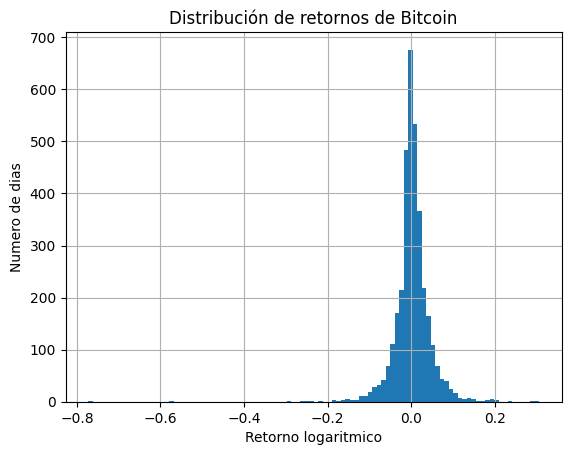

In [29]:
df_returns['BTC_Log_Return'].hist(bins=100)
plt.title('Distribución de retornos de Bitcoin')
plt.xlabel('Retorno logaritmico')
plt.ylabel('Numero de dias')
plt.show()

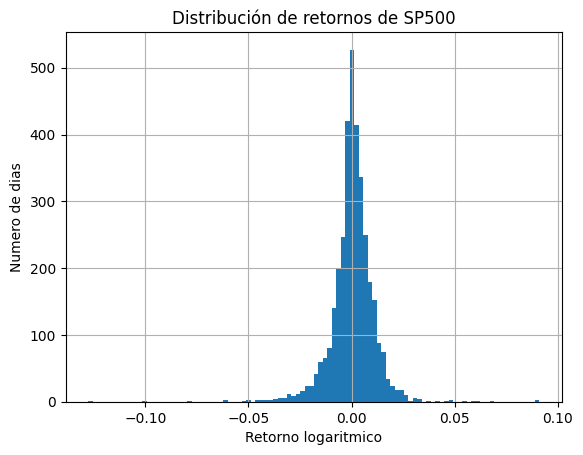

In [30]:
df_returns['SP500_Log_Return'].hist(bins=100)
plt.title('Distribución de retornos de SP500')
plt.xlabel('Retorno logaritmico')
plt.ylabel('Numero de dias')
plt.show()

### Comparamos a misma escala

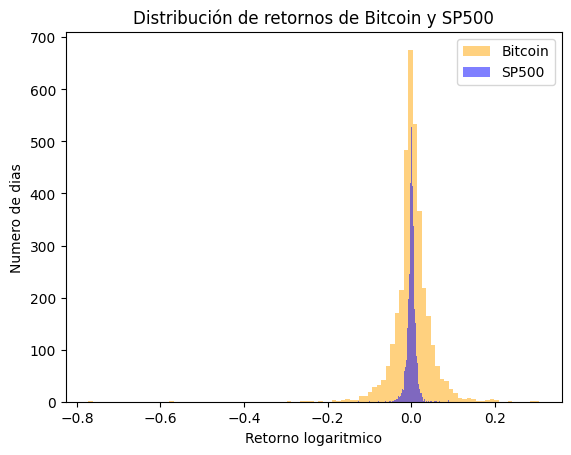

In [31]:
plt.hist(
    df_returns['BTC_Log_Return'],
    alpha=0.5,
    label='Bitcoin',
    bins=100,
    color = 'orange'
)
plt.hist(
    df_returns['SP500_Log_Return'],
    alpha=0.5,
    label='SP500',
    bins=100,
    color = 'blue'
)
plt.title('Distribución de retornos de Bitcoin y SP500')
plt.xlabel('Retorno logaritmico')
plt.ylabel('Numero de dias')
plt.legend()
plt.show()

### Veamos el riesgo

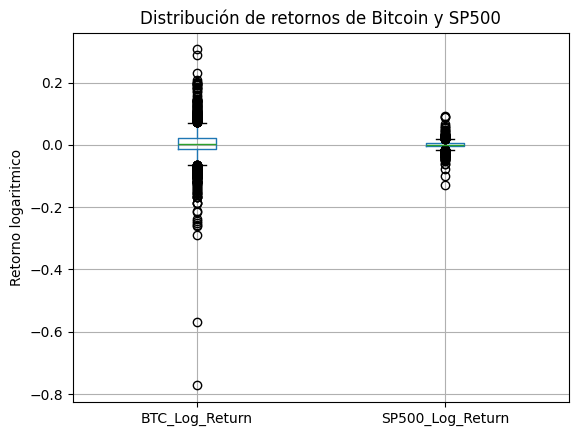

In [32]:
df_returns.boxplot()
plt.title('Distribución de retornos de Bitcoin y SP500')
plt.ylabel('Retorno logaritmico')
plt.show()

# 6. ¿Correlación entre BTC y SP500?
En este paso analizamos la relación entre ambos activos.
La pregunta es sencilla pero clave:
> ¿Se mueven juntos Bitcoin y el S&P 500… o no?

La correlación mide:
- +1 --> se mueven casi igual
- 0 --> no tienen relación clara
- −1 --> se mueven en direcciones opuestas

Esto es fundamental para entender si Bitcoin:
- Aporta diversificación
- O se comporta como “otro activo de riesgo más”

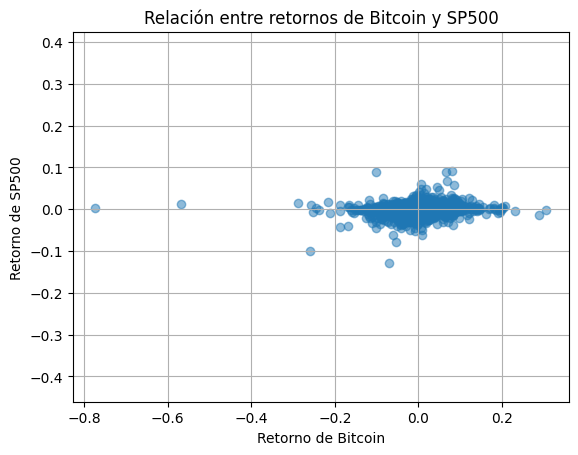

In [33]:
plt.scatter(
    df_returns['BTC_Log_Return'],
    df_returns['SP500_Log_Return'],
    alpha=0.5
)

plt.title('Relación entre retornos de Bitcoin y SP500')
plt.xlabel('Retorno de Bitcoin')
plt.ylabel('Retorno de SP500')
plt.grid(True)
plt.axis('equal')
plt.show()

### Patrones posibles en la gráfica
1. Nube sin forma definida
- Puntos muy dispersos
- Sin dirección clara

Conclusion --> Relación débil o inexistente

2. Ligera diagonal positiva
- Tendencia ascendente poco marcada

Conclusion --> Relación positiva moderada en algunos periodos

3. Cono horizontal
- Mucha dispersión en Bitcoin
- Poco movimiento relativo en el S&P 500

Conclusion --> Bitcoin amplifica movimientos sin arrastrar al mercado tradicional

4. Puntos extremos en Bitcoin
- Movimientos muy grandes en BTC
- Respuesta limitada del S&P 500

Conclusion --> Dinámica propia de Bitcoin

### Conclusión del scatter
- Alta dispersion en el eje X
- Baja dispersion en el eje Y
- No se aprecia una relación lineal fuerte(no se ve la diagonal)

Por lo tanto esto quiere decir que Bitcoin muestra una dinamica propia y mucho mas agresiva mientras que SP500 actua como un activo mas estable. Ademas al no haber una relacion lineal, quiere decir que no hay una correlación (al menos no es constante en el tiempo).


---



# 7. ¿Como evoluciona la correlación?
En este paso vamos a analizar cómo evoluciona la correlación usando ventanas móviles (rolling windows).

Así podemos ver:
- Cuándo se mueven de forma parecida
- Cuándo se desacoplan
- En qué momentos Bitcoin actúa como activo independiente
- Y en cuáles se comporta como un activo de riesgo más

In [34]:
# Correlacion movil a 60 dias
correlacion_60 = (
    df_returns['BTC_Log_Return'].rolling(window=60).corr(df_returns['SP500_Log_Return'])
)

In [35]:
# Correlacion movil de 120 dias
correlacion_120 = (
    df_returns['BTC_Log_Return'].rolling(window=120).corr(df_returns['SP500_Log_Return'])

)

In [36]:
# Correlacion movil de 252
# 252 son dias de cotizacion en un año aprox
correlacion_252 = (
    df_returns['BTC_Log_Return'].rolling(window=252).corr(df_returns['SP500_Log_Return'])
)

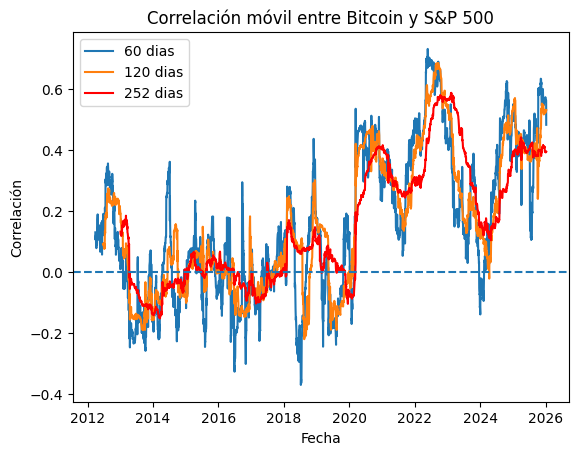

In [39]:
# Visualizamos
plt.plot(correlacion_60, label='60 dias')
plt.plot(correlacion_120, label='120 dias')
plt.plot(correlacion_252, label='252 dias', color='red')

plt.axhline(0, linestyle='--')
plt.title("Correlación móvil entre Bitcoin y S&P 500")
plt.ylabel("Correlación")
plt.xlabel("Fecha")
plt.legend()
plt.show()

### Interpretación de la correlación móvil

- Correlación cercana a 0

-Relación débil entre Bitcoin y S&P 500

-Bitcoin se mueve de forma independiente
- Correlación positiva

-Ambos activos tienden a moverse en la misma dirección

-Bitcoin actúa como activo de riesgo
- Correlación alta

-Movimiento conjunto claro

-Pérdida de capacidad de diversificación

- Correlación negativa

-Movimientos en direcciones opuestas

-Bitcoin actúa como activo descorrelacionado en ese periodo

-Posible efecto diversificador puntual
- Correlación variable en el tiempo

-Alternancia entre fases de correlación y descorrelación

-Relación dependiente del contexto de mercado

### Conclusiones

La correlación entre Bitcoin y el S&P 500 **no es constante en el tiempo**. Durante largos periodos, especialmente antes de 2020, Bitcoin se comporta de forma relativamente independiente del mercado bursátil tradicional.

Sin embargo, en momentos de estrés e incertidumbre, la correlación aumenta de forma clara, y Bitcoin tiende a moverse en la misma dirección que el S&P 500. Esto indica que su capacidad de diversificación **depende del contexto de mercado** y se reduce precisamente en las fases más críticas.

En resumen, Bitcoin alterna entre fases de descorrelación y fases en las que actúa como un activo de riesgo más.


# 8. Drawdowns y caidas maximas
En este paso se analiza el drawdown, una de las métricas más relevantes para evaluar el riesgo real de un activo financiero. A diferencia de la volatilidad o la correlación, el drawdown mide la magnitud de las caídas desde los máximos históricos, reflejando el impacto psicológico y financiero que sufre un inversor durante los peores periodos.

El objetivo de este análisis es comparar la profundidad y duración de las caídas de Bitcoin y del SP 500. Este enfoque permite entender no solo cuánto puede llegar a caer un activo, sino también la capacidad de recuperación tras grandes pérdidas.

El análisis de drawdowns complementa los pasos anteriores, ya que conecta la evolución temporal de la relación entre ambos activos con las fases de mayor estrés del mercado, proporcionando una visión más completa del perfil de riesgo de Bitcoin frente al mercado bursátil tradicional.

In [47]:
start_date = df_daily_btc.index.min()

In [48]:
btc_price = df_daily_btc.loc[start_date:, 'Close']
sp_price = df_sp.loc[start_date:, 'Close']

In [49]:
# Calculamos el maximo acumulado
btc_max = btc_price.cummax()
sp_max = sp_price.cummax()

La formula del drawdown es la siguiente:


```
drawdown = (Precio / Maximo historico) - 1
```



In [50]:
# Drawdown de BTC
btc_drawdown = (btc_price / btc_max) - 1

In [51]:
# Drawdown de SP500
sp_drawdown = (sp_price / sp_max) - 1

In [52]:
btc_drawdown.min(), sp_drawdown.min()

(-0.8418409749013638, -0.3392496000265327)

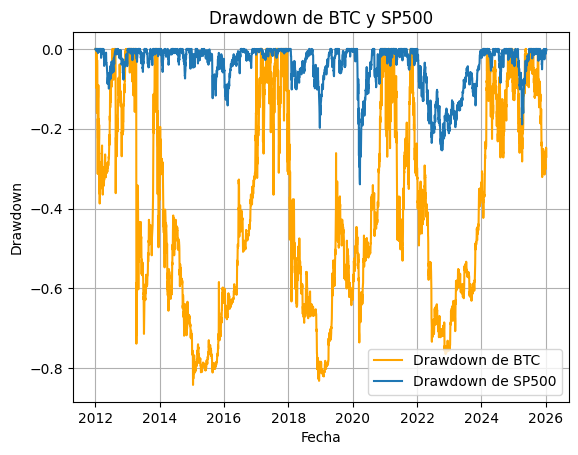

In [54]:
# Mostramos por graficos
plt.plot(btc_drawdown, label='Drawdown de BTC', color='orange')
plt.plot(sp_drawdown, label='Drawdown de SP500')

plt.title('Drawdown de BTC y SP500')
plt.ylabel('Drawdown')
plt.xlabel('Fecha')
plt.grid(True)
plt.legend()
plt.show()

### Conclusión
El análisis de drawdowns desde 2012 muestra que Bitcoin sufre caídas significativamente más profundas (60-80%) y frecuentes que el S&P 500(20%).

Aunque ambos activos experimentan drawdowns en periodos de estrés, Bitcoin amplifica las pérdidas y permanece más tiempo alejado de sus máximos históricos. Esto confirma que Bitcoin presenta un perfil de riesgo mucho más agresivo, mientras que el S&P 500 ofrece un comportamiento más estable y predecible en el largo plazo.

> Ademas, un punto que me gustaría añadir es que curiosamente se puede ver el famoso ciclo de 4 años de BTC. Como podemos ver, las maximas caidas que hemos visto en BTC suceden cada 4 años: la primera que vemos en 2015, la segunda en 2019 y la tercera en 2023. Si sigue con esta pauta, ¿quiere decir que a principios del 2027 veremos el suelo de BTC?



Dejemos que el tiempo conteste a esta pregunta...

# 9. Conclusiones finales
- Bitcoin presenta mayor volatilidad y caídas más profundas que el S&P 500.
- El S&P 500 muestra un comportamiento más estable y progresivo.
- La correlación entre ambos activos varía en el tiempo.
- En momentos de estrés, Bitcoin tiende a comportarse como un activo de riesgo.